In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import sklearn
import datetime
from sklearn import datasets, linear_model, metrics
%matplotlib inline

[[ -4.18548395e-05]]
[ 61994.37153161]


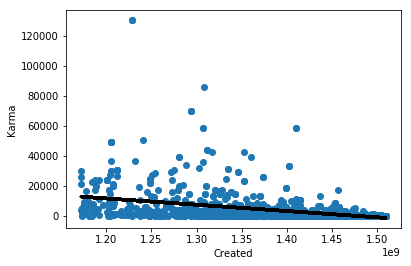

In [60]:
# Part 1

df = pd.read_json('users.json').dropna(subset=['created','karma'], how='all')
df = df.drop(['about', 'error', 'id'], axis=1)

# read_json() changes dtypes of 'created' and 'karma' to float64 for some reason
# Casting them to integers so we can actually use them
df['created'] = df['created'].astype(int).values.reshape(-1,1)
df['karma'] = df['karma'].astype(int).values.reshape(-1,1)

X_tr, X_te, Y_tr, Y_te = sklearn.model_selection.train_test_split(df['created'].values, df['karma'].values, test_size=0.20, random_state=5)

regr = linear_model.LinearRegression()

# Training the linear regression model.
regr.fit(X_tr.reshape(-1,1),Y_tr.reshape(-1,1))

pred = regr.predict(X_te.reshape(-1,1))

fig, ax = plt.subplots()

# Scatter plot
plt.scatter(X_te,Y_te)
plt.xlabel('Created')
plt.ylabel('Karma')
plt.plot(X_te,pred, color='black', linewidth=3)

# A
coef = regr.coef_
# B
intercept = regr.intercept_

print(coef)
print(intercept)

# The coefficient describes the rate at which the response variable changes for every change in the predictor.
# The intercept is the mean of Y when X is 0, but since we have no X-values at 0, the intercept has no real meaning.
# The coefficient is in negative, so the X-value decreases when the Y-value increases, meaning it is an inverse relationship.
# The intercept, as mentioned, is meaningless in a sample with only non-0 values.


In [13]:
# Part 2

print('Test data: ' + str(metrics.mean_absolute_error(Y_te,pred)))
print('Training data: ' + str(metrics.mean_absolute_error(Y_tr,regr.predict(X_tr.reshape(-1,1)))))

# The smaller the numbers, the better the model fits the sample we're using.
# The numbers skew very far away from 0, making the MAE model very inefficient for our sample due to a few outliers.

Test data: 4366.59123274
Training data: 4482.32480631


In [14]:
# Part 3

print('Test data: ' + str(metrics.mean_squared_error(Y_te, pred)))
print('Training data: ' + str(metrics.mean_squared_error(Y_tr,regr.predict(X_tr.reshape(-1,1)))))

# Again, the smaller the number, the better the model fits. Evidently, the MSE fits even worse for our sample.
# MSE is even less robust towards outliers than MAE, and our sample has a few very large outliers.

Test data: 78059377.8934
Training data: 100613209.759


In [15]:
# Part 4

print('Test data: ' + str(metrics.r2_score(Y_te, pred)))
print('Training data: ' + str(metrics.r2_score(Y_tr,regr.predict(X_tr.reshape(-1,1)))))

# This time, the numbers have approached very close to 0, making Pearson's r easily the best-fitting model.
# When large outliers are involved, squared models seemingly perform much better.

Test data: 0.132688206996
Training data: 0.127692903639


In [16]:
# Part 5

# If we assume that the values in the 'created' represent a timestamp in Unix epoch time,
# we can assume that to a lesser degree, the earlier you created your account, the higher your chances are.
# However, the presence of numerous outliers also suggests that there is perhaps a certain element of luck involved.
# The average concentration of karma is very low at every point of the X-axis, so it seems likely that registration date is not the primary factor.

# The prediction seems fairly accurate due to the very low score through Pearson's r, and would not have been if there was no model supporting the prediction.
# The prediction could perhaps be made more accurate with a much larger sample, as well as slightly more clarity on the meaning of the data therein.